**IMPORT DATASET**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#Good practice in case involving more columns
pd.set_option('display.max_columns', 200) 

In [2]:
df = pd.read_csv("data/heart.csv")

**DISPLAY DATASET**

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


1.age
2.sex
3.chest pain type (4 values)
4.resting blood pressure
5.serum cholestoral in mg/dl
6.fasting blood sugar > 120 mg/dl
7.resting electrocardiographic results (values 0,1,2)
8.maximum heart rate achieved
9.exercise induced angina
10.oldpeak = ST depression induced by exercise relative to rest
11.the slope of the peak exercise ST segment
12.number of major vessels (0-3) colored by flourosopy
13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**CHECK FOR NULL VALUES**

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**CHECK FOR DUPLICATE DATA & DROP**

In [7]:
df_dup = df.duplicated().any()
print(df_dup)

True


In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(302, 14)

**GET OVERALL STATISTICS OF THE DATASET**

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**DRAW CORRELATION MATRIX**

<Axes: >

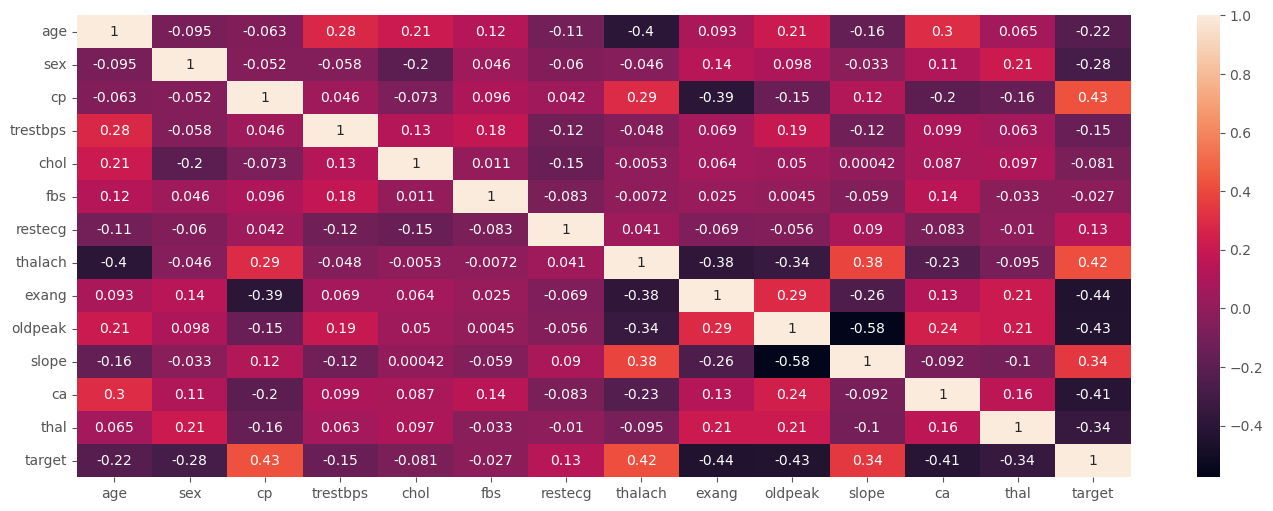

In [11]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(), annot=True)

**HOW MANY PEOPLE HAVE HEART DISEASE & HOW MANY PEOPLE DOESNT HAVE HEART DISEASE IN THIS DATASET?**

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

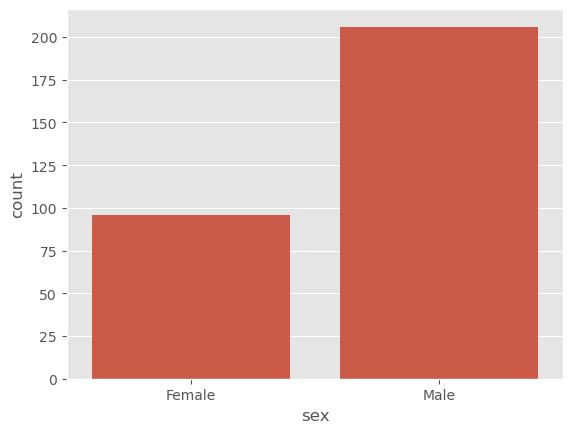

In [19]:
df['target'] = df['target'].astype(int)
sns.countplot(x='sex', data=df)
plt.xticks([0,1], ['Female','Male'])
plt.show()

**FIND GENDER DISTRIBUTION ACCORDING TO THE TARGET VARIABLE**

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

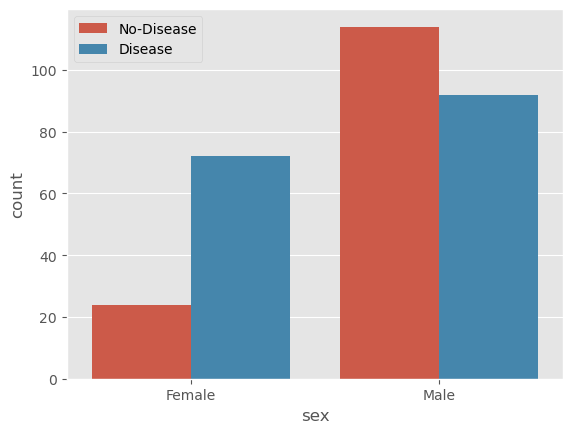

In [29]:
sns.countplot(x='sex', hue='target', data=df)
plt.xticks([0,1], ['Female','Male'])
plt.legend(labels=['No-Disease', 'Disease'])
plt.show()

### 

**CHECK AGE DISTRIBUTION IN THE DATASET**

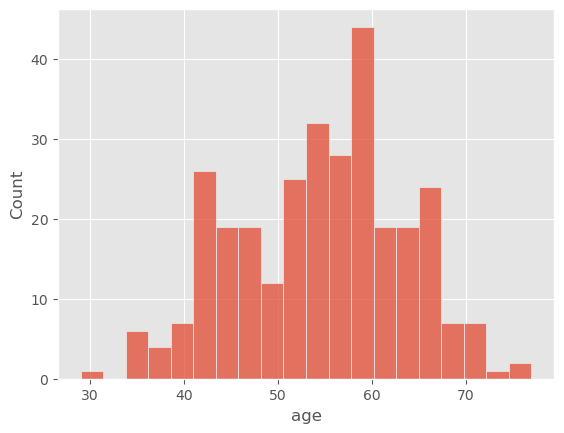

In [36]:
sns.histplot(df['age'],bins=20)
plt.show()

**CHECK CHEST PAIN TYPE**
- Value 0: Typical Angina
- Value 1: Atypical Angina
- Value 2: Non-Anginal Pain
- Value 3: Asymptomatic

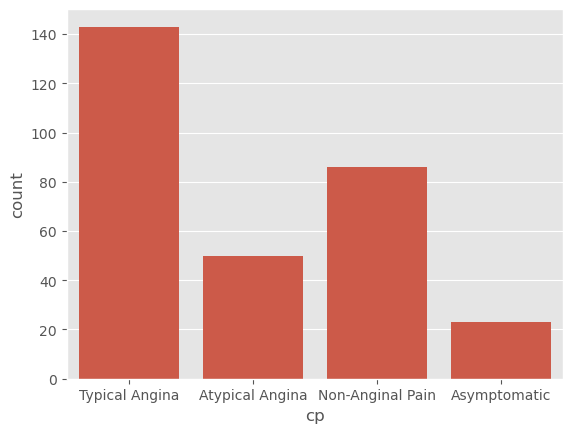

In [41]:
sns.countplot(x='cp', data=df)
plt.xticks([0,1,2,3], ["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"])
plt.show()

**SHOW THE CHEST-PAIN DISTRIBUTION AS PER TARGET VARIABLE**

In [43]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

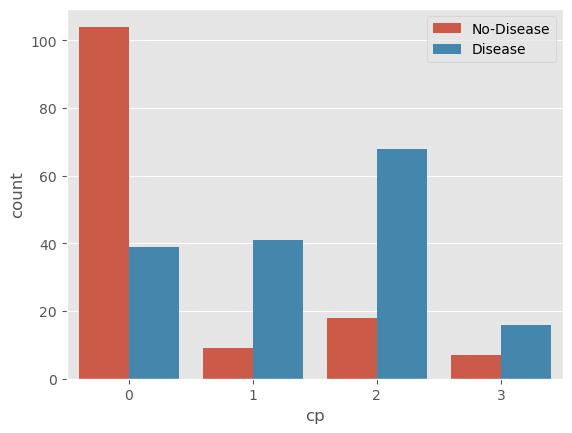

In [46]:
sns.countplot(x='cp', hue='target', data=df)
plt.legend(labels=['No-Disease', 'Disease'])
plt.show()

**SHOW FASTING BLOOD SUGAR DISTRIBUTION ACCORDING TO TARGET VARIABLE**

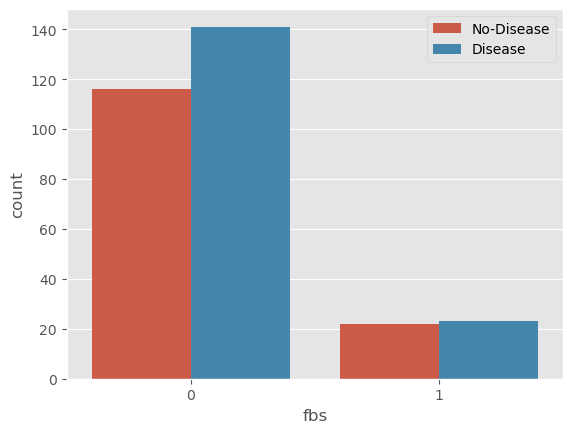

In [47]:
sns.countplot(x='fbs', hue='target', data=df)
plt.legend(labels=['No-Disease', 'Disease'])
plt.show()

**CHECK RESTING BLOOD PRESSURE DISTRIBUTION**

<Axes: >

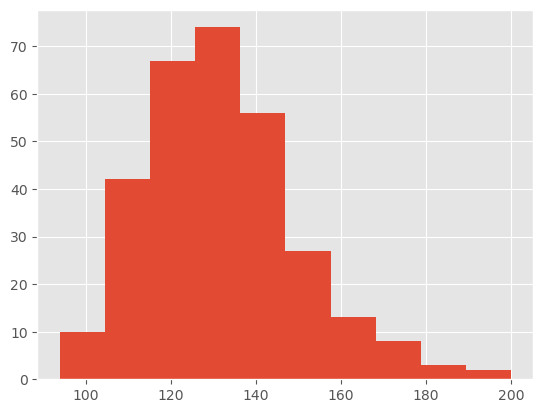

In [48]:
df['trestbps'].hist()

**COMPARE RESTING BLOOD PRESSURE AS PER SEX COLUMN**

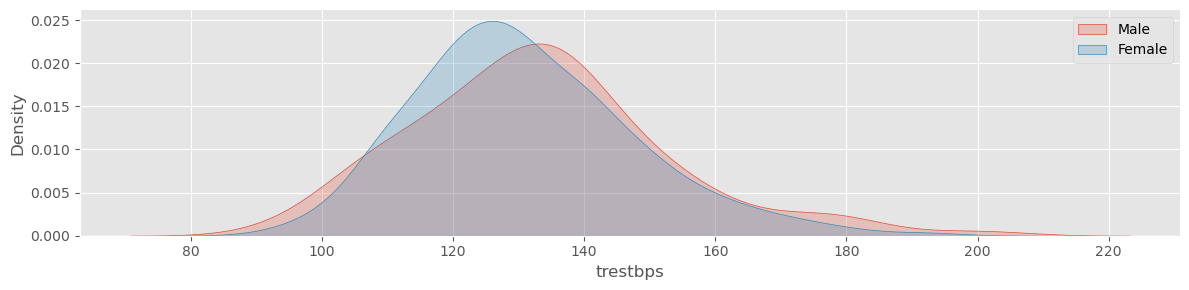

In [53]:
g = sns.FacetGrid(df,hue="sex", aspect=4)
g.map(sns.kdeplot, 'trestbps',fill=True)
plt.legend(labels=['Male', 'Female'])

**SHOW DISTRIBUTION OF SERUM CHOLESTROL**

In [54]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

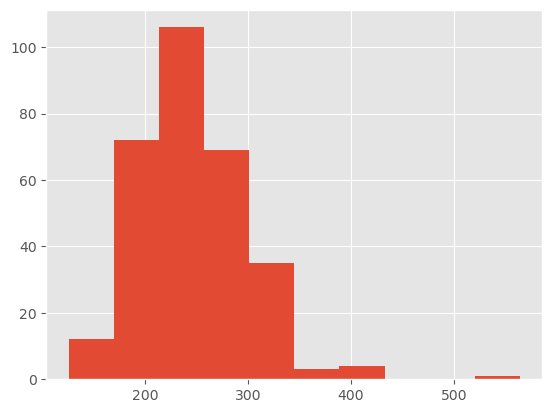

In [56]:
df['chol'].hist()